# Clone the repo
### (For use in colab)
[![Open in Colaboratory](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rizerphe/dev_datasets_analysis_project/blob/main/notebook.ipynb)

In [ ]:
!git clone --recursive https://github.com/rizerphe/dev_datasets_analysis_project.git
%cd dev_datasets_analysis_project
!python download_stackoverflow.py

# Load the dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# Load the data

dec_2021 = pd.read_csv('./csv/salaries/2021_dec_raw.csv', delimiter=';')
dec_2021_devs = dec_2021[dec_2021['Оберіть вашу посаду'] == 'Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)']
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)
dec_2021_devs = dec_2021_devs.dropna(subset=['Зарплата у $$$ за місяць, лише ставка після сплати податків'])

/tmp/ipykernel_166005/3266199665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)


In [73]:
dec_2021_devs

,Timestamp,Ви працюєте зараз в ІТ?,Де ви мешкаєте?,Де ви працюєте?,Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,Оберіть вашу посаду,...,Тип компанії,Кількість спеціалістів у вашій компанії (в Україні),Загальний стаж роботи в ІТ,Загальний стаж роботи за спеціальністю,У скількох компаніях встигли попрацювати за час ІТ-кар'єри?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Наскільки змінилась ваша зарплата за останні 12 місяців?,"Ставка у $$$ за годину, яку ви виставляєте клієнтам",Чи отримуєте ви грошові бонуси до зарплати?,Вкажіть суму цього бонуса у $$$ після податків
6187,11/30/2021 16:50:41,"Так, працюю full-time",Дніпро,Віддалено,Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 1000,0.5,10 і більше років,5–7,18000,5600,NaN,"Отримую бонус за гарні показники роботи, але н...",NaN
6188,11/29/2021 12:20:22,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Доктор наук,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,понад 1000,0.5,5 років,5–7,16800,2400,145,"Ні, не отримую",NaN
6189,11/30/2021 11:36:42,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,0.5,10 і більше років,5–7,15250,9250,NaN,"Отримую бонус за гарні показники роботи, але н...",2500
6190,12.05.2021 19:37,"Так, працюю full-time",Харків,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,до 1000,0.5,4 роки,8 і більше,15000,5000,NaN,Отримую бонус щомісяця,2000
6191,11/29/2021 11:00:54,"Так, працюю full-time",Київ,Віддалено,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,0.5,10 і більше років,NaN,14300,5530,55,"Ні, не отримую",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14187,12/15/2021 11:35:02,"Так, працюю full-time",Вінниця,В офісі,Жінка,20,Ще студент вишу,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 200,0.5,Пів року,1,100,any changes,NaN,"Ні, не отримую",NaN
14188,12.12.2021 17:30,"Так, працюю full-time",Вінниця,В офісі,Чоловік,25,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 200,0.5,Пів року,2,100,100,NaN,"Ні, не отримую",NaN
14189,12/15/2021 15:14:29,"Так, працюю full-time",Київ,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,Лише я,0.5,Менше як 3 місяці,1,100,10,1,"Ні, не отримую",0
14190,12/16/2021 16:12:48,"Так, працюю full-time",Київ,Віддалено,Чоловік,18,Середня спеціальна,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,до 10 спеціалістів,0.5,Пів року,1,100,0,NaN,"Отримую бонус за гарні показники роботи, але н...",50


# Середня зарплата програміста

In [55]:
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()

3463.350156152405

In [61]:
# Salary depending on region
dec_2021_devs.set_index('Де ви мешкаєте?').groupby('Де ви мешкаєте?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values(ascending=False)

Де ви мешкаєте?
Київ                3822.633294
Львів               3549.886143
Одеса               3451.226829
Дніпро              3338.937639
Харків              3330.210780
Вінниця             3067.253219
Івано-Франківськ    3049.858896
Маріуполь           2959.444444
Ужгород             2894.024390
Тернопіль           2846.272727
Чернігів            2810.612245
Інше                2805.766055
Суми                2766.200000
Херсон              2732.257143
Черкаси             2726.455696
Миколаїв            2681.216216
Житомир             2661.490566
Рівне               2660.916667
Запоріжжя           2645.476190
Хмельницький        2630.105263
Луцьк               2611.739130
Полтава             2590.833333
Чернівці            2396.902913
Кривий Ріг          2343.450000
Кропивницький       1791.818182
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

In [62]:
dec_2021_devs['Де ви працюєте?'].value_counts()

Віддалено                               4709
Частково віддалено, частково в офісі    2190
В офісі                                  982
Name: Де ви працюєте?, dtype: int64

In [64]:
dec_2021_devs['Загальний стаж роботи в ІТ'].value_counts()

10 і більше років    1700
3 роки                870
5 років               869
4 роки                776
6 років               690
2 роки                605
7 років               522
1 рік                 408
8 років               404
1,5 року              338
Пів року              321
9 років               318
Менше як 3 місяці      94
3 місяці               90
Name: Загальний стаж роботи в ІТ, dtype: int64

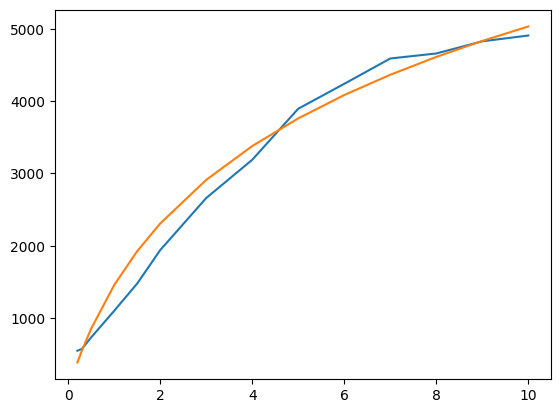

In [52]:
data = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values()

index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))

sub = plt.subplot()
sub.plot(index, data)
sub.plot(index, [2100 * math.log(x + 1) for x in index])

In [55]:
def sort_by_criteria(criteria, threshold=None):
    index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values().index
    index_dict = dict(zip(index_names, index))


    for key in sorted(dec_2021_devs[criteria].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria] == key)):
        data = dec_2021_devs[dec_2021_devs[criteria] == key].groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()

        n = sum(dec_2021_devs[criteria] == key)
        print(f"{key} - {n} responses")

        if threshold is None or n > threshold:
            sub = plt.subplot()
            sorted_index = sorted(data.index, key=lambda x: index_dict[x])
            sub.plot(sorted(index_dict[x] for x in data.index), [data[x] for x in sorted_index])
            sub.plot(index, [2100 * math.log(x + 1) for x in index])
            plt.show()

Київ - 3376 responses


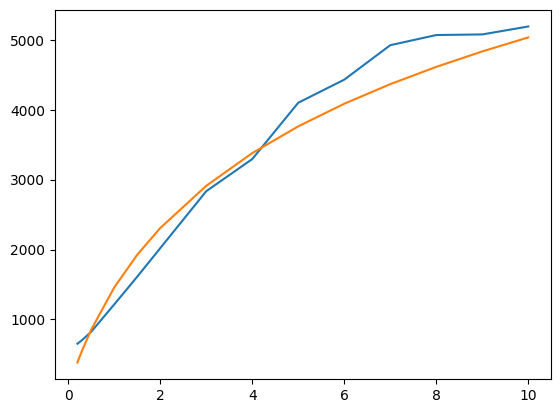

Львів - 1133 responses


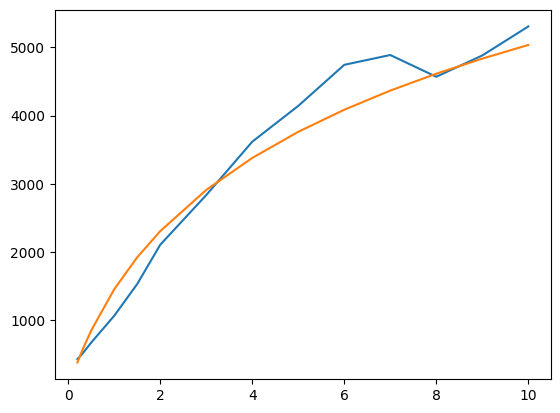

Харків - 1039 responses


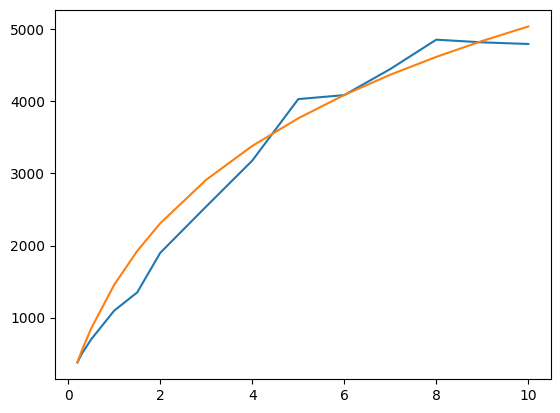

Дніпро - 449 responses


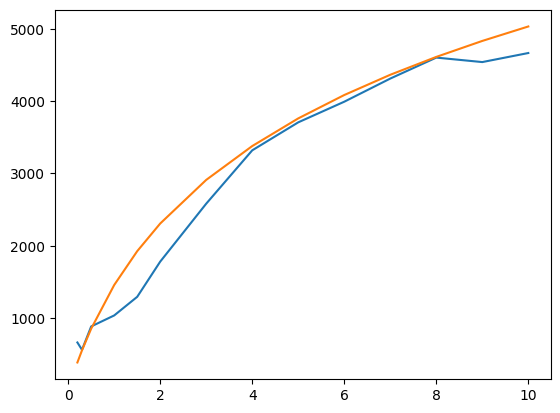

Одеса - 410 responses


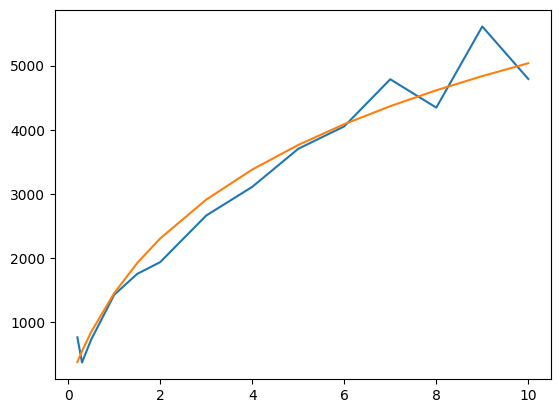

Вінниця - 233 responses
Інше - 218 responses
Івано-Франківськ - 163 responses
Запоріжжя - 105 responses
Чернівці - 103 responses
Тернопіль - 88 responses
Черкаси - 79 responses
Хмельницький - 76 responses
Миколаїв - 74 responses
Рівне - 60 responses
Полтава - 54 responses
Житомир - 53 responses
Суми - 50 responses
Чернігів - 49 responses
Луцьк - 46 responses
Ужгород - 41 responses
Херсон - 35 responses
Кропивницький - 33 responses
Кривий Ріг - 20 responses
Маріуполь - 18 responses


In [56]:
sort_by_criteria("Де ви мешкаєте?", 300)

JavaScript - 1541 responses


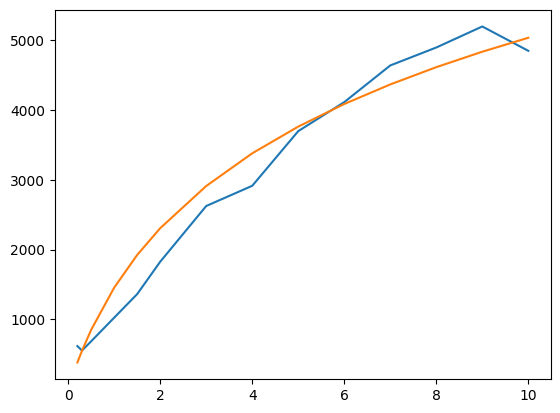

C# / .NET - 1225 responses


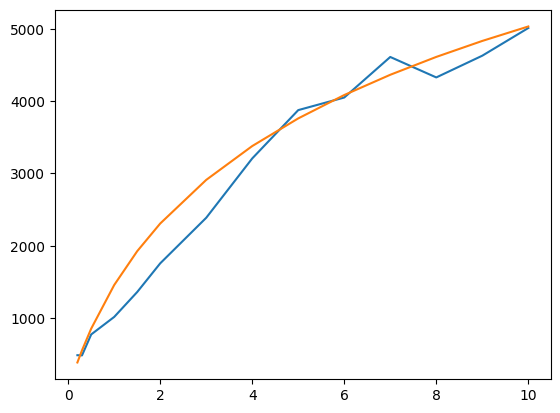

Java - 1191 responses


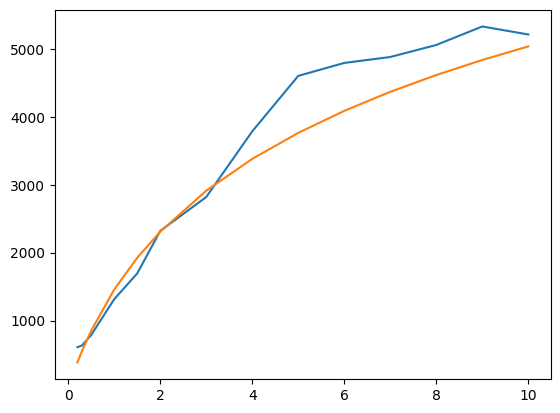

TypeScript - 868 responses


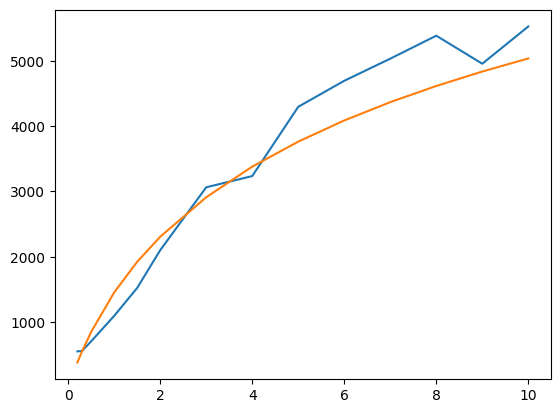

PHP - 867 responses


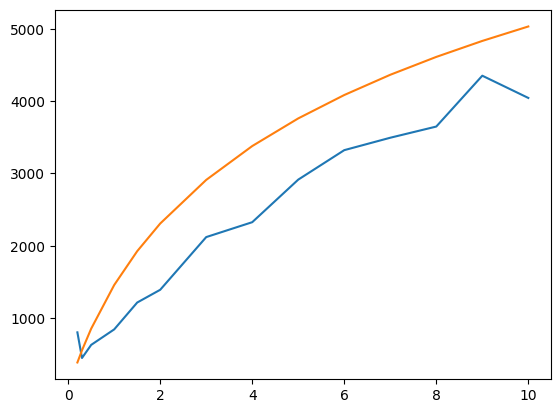

Python - 481 responses


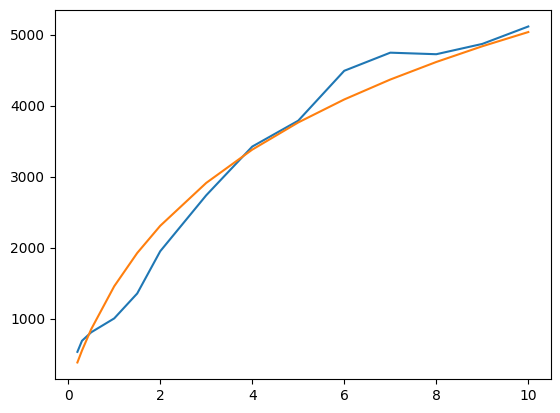

Kotlin - 287 responses
Swift - 284 responses
C++ - 274 responses
Ruby - 167 responses
Go - 151 responses
Dart - 86 responses
C - 78 responses
Scala - 66 responses
1С - 56 responses
Salesforce Apex - 53 responses
SQL - 46 responses
Інша мова - 34 responses
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses
Objective-C - 18 responses
Rust - 17 responses
Elixir - 11 responses
Не можу обрати одну основну мову - 10 responses
Clojure - 10 responses
Erlang - 8 responses
ABAP - 7 responses
Pascal/Delphi - 7 responses
Perl - 5 responses
Groovy - 5 responses
APL - 4 responses
Haskell - 3 responses
nan - 0 responses


In [95]:
sort_by_criteria("Основна мова програмування", 300)

### Loading dataset for june 2022

In [13]:
# Load data about june 2022

june_2022 = pd.read_csv('./csv/salaries/2022_june_dev.csv', delimiter=',')
june_2022['salary'] = june_2022['salary'].astype(int)
june_2022 = june_2022.dropna(subset=['salary'])

### Середня зарплата у 2022 році (червень)

In [20]:
june_2022['salary'].mean()

3694.6916048957078

In [21]:
# Salary depending on region

june_2022.set_index('city').groupby('city')['salary'].mean().sort_values(ascending=False)

city
Київ                3868.395699
Львів               3864.528646
Інше                3721.053826
Вінниця             3511.506211
Івано-Франківськ    3426.253012
Дніпро              3305.200599
Одеса               3262.035242
Харків              2920.277778
Name: salary, dtype: float64

In [22]:
june_2022['experience'].value_counts()

від 1 до 3 років     1984
від 4 до 6 років     1756
від 7 до 10 років    1089
понад 10 років        539
до року               433
Name: experience, dtype: int64

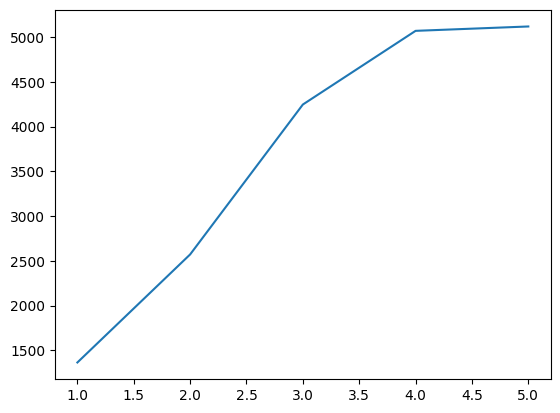

In [31]:
data_2022 = june_2022.groupby('experience')['salary'].mean().sort_values()

index_2022 = list(range(1, 6))
sub = plt.subplot()
sub.plot(index_2022, data_2022)

In [61]:
def sort_by_criteria_2022(criteria, threshold=None):
    index_new = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.groupby('experience')['salary'].mean().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_new))

    for key in sorted(june_2022[criteria].unique(), reverse=True, key=lambda key: sum(june_2022[criteria] == key)):
        data_2022 = june_2022[june_2022[criteria] == key].groupby('experience')['salary'].mean()

        n = sum(june_2022[criteria] == key)
        print(f"{key} - {n} responses")

        if threshold is None or n > threshold:
            sub = plt.subplot()
            sorted_index = sorted(data_2022.index, key=lambda x: index_dict_2022[x])
            sub.plot(sorted(index_dict_2022[x] for x in data_2022.index), [data_2022[x] for x in sorted_index])
            plt.show()

Інше - 1895 responses


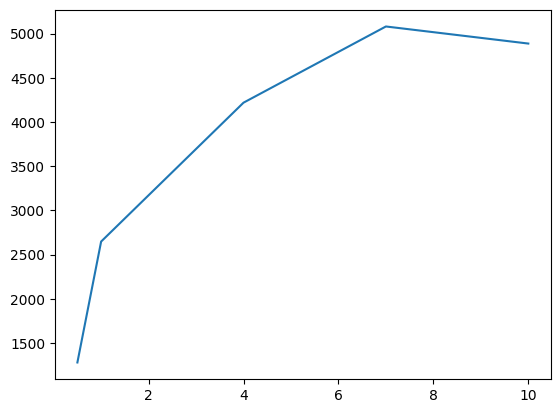

Київ - 1395 responses


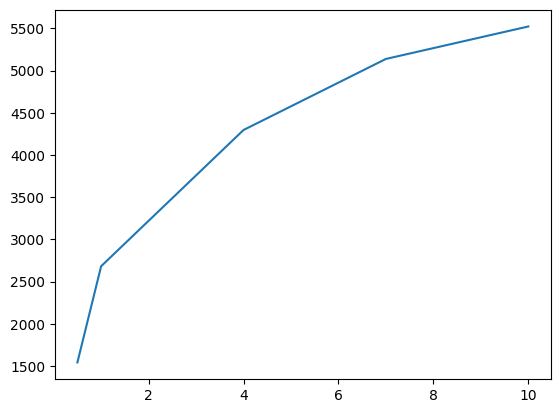

Львів - 1152 responses


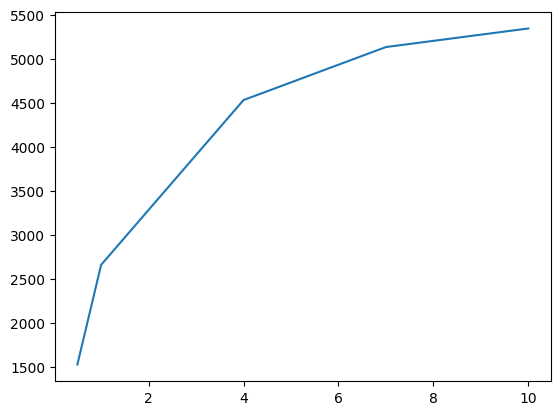

Дніпро - 334 responses


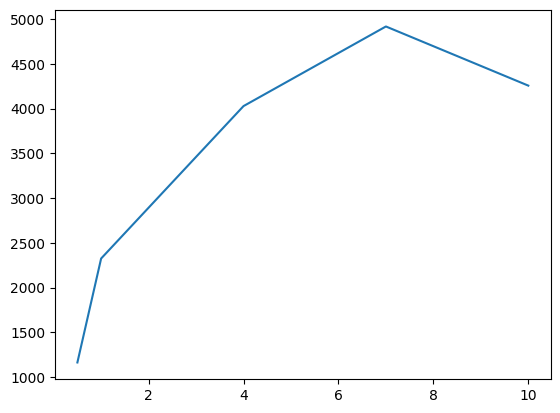

Івано-Франківськ - 332 responses


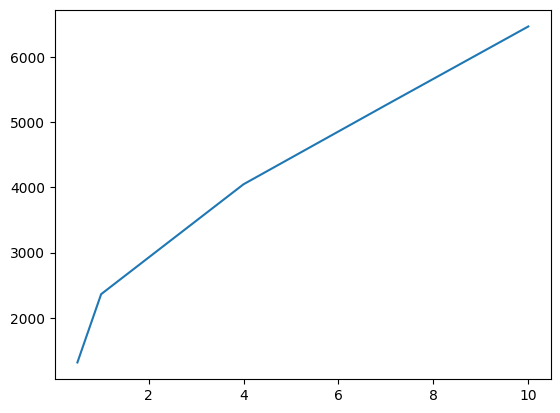

Вінниця - 322 responses


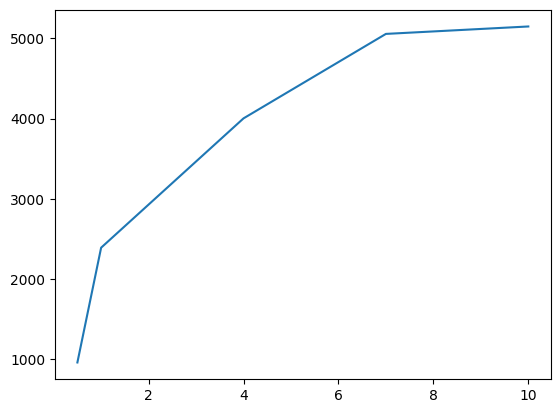

Одеса - 227 responses


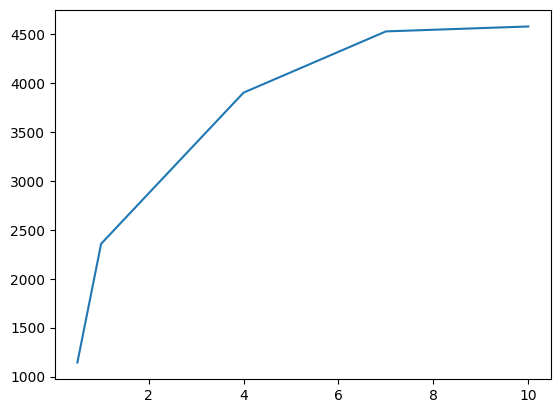

Харків - 144 responses


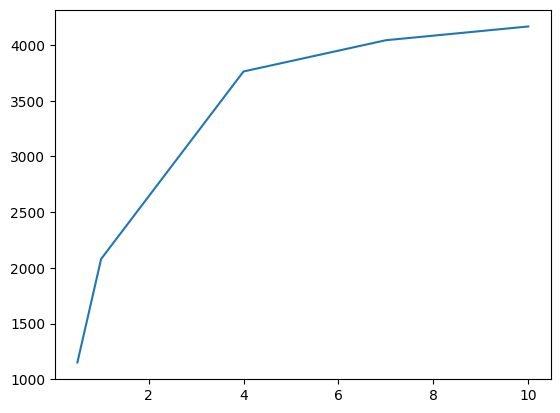

In [62]:
sort_by_criteria_2022("city", 100)

JavaScript - 1032 responses


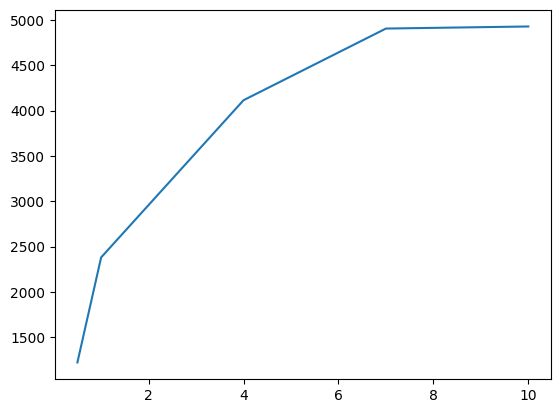

C#/.NET - 848 responses


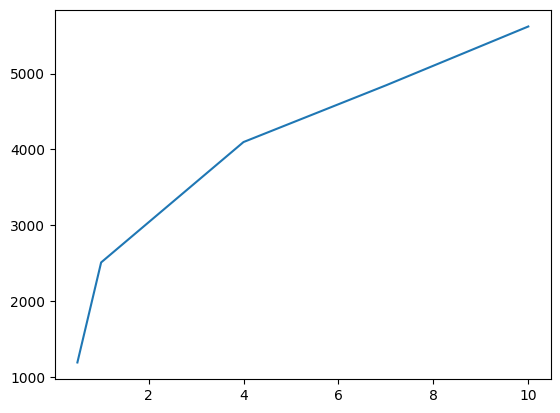

Java - 832 responses


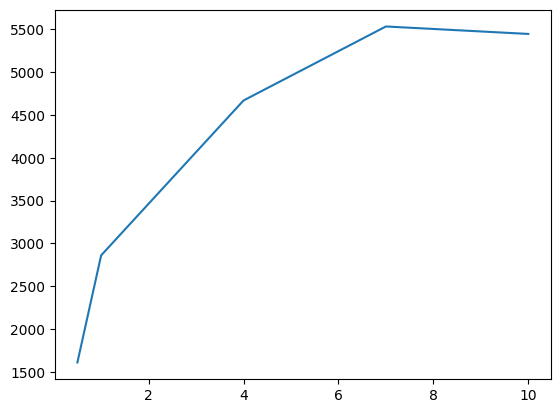

TypeScript - 719 responses


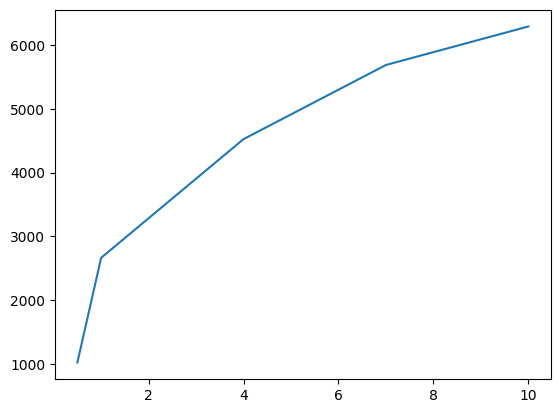

PHP - 538 responses


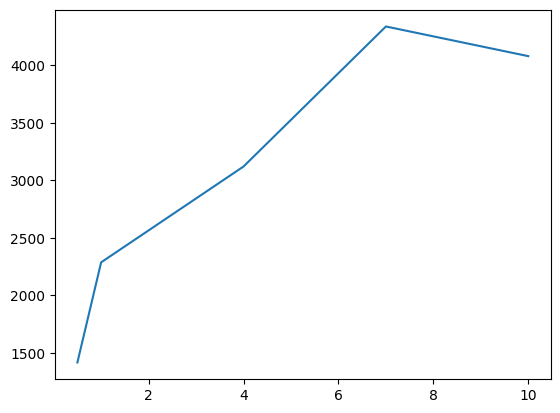

Інша - 519 responses


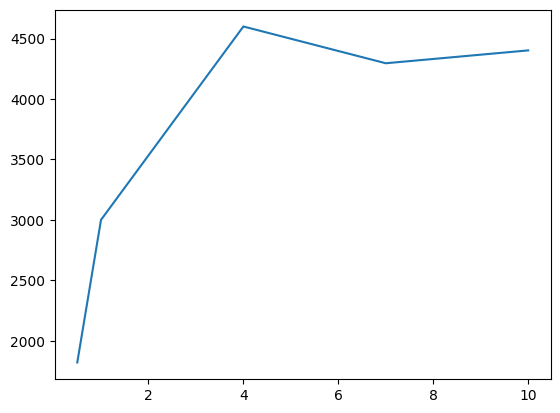

Python - 395 responses


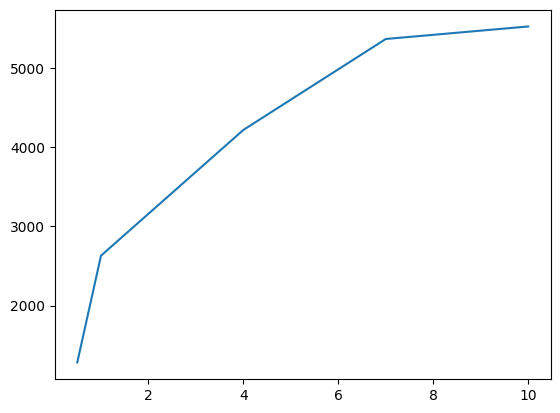

Kotlin - 254 responses


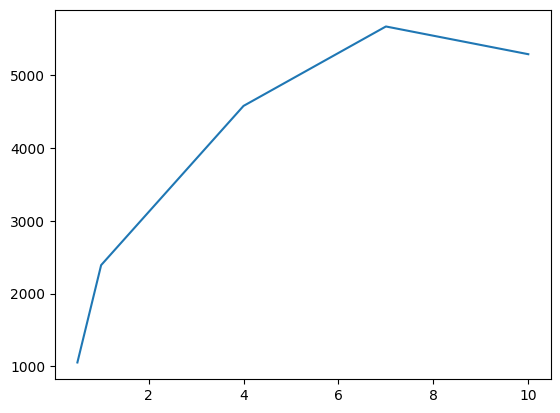

Swift - 226 responses


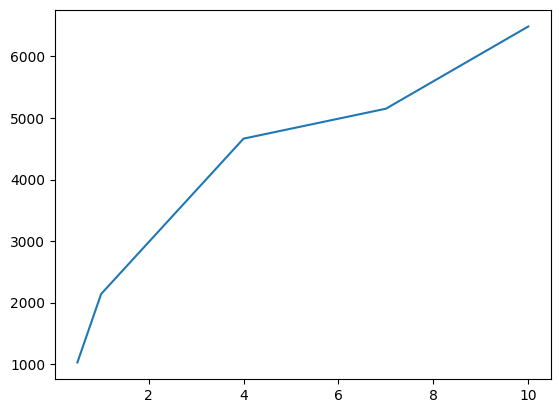

C++ - 201 responses


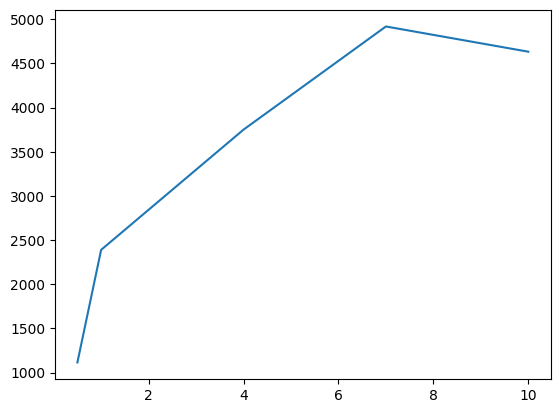

Ruby - 163 responses


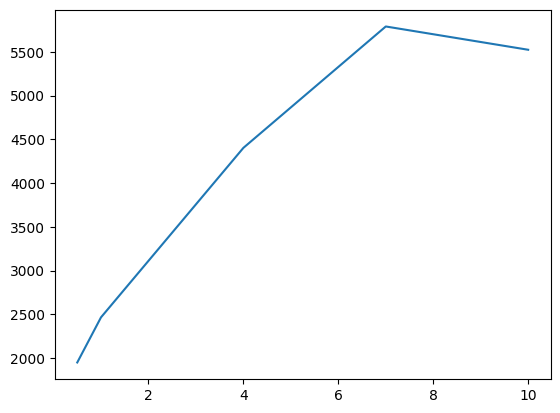

C - 60 responses
Objective-C - 8 responses
Clojure - 6 responses


In [63]:
sort_by_criteria_2022("tech", 100)

In [14]:
def sort_by_criteria_both(criteria1, criteria2, threshold=None):
    index_2021 = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values().index
    index_dict_2021 = dict(zip(index_names_2021, index_2021))
    index_2022 = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.dropna(subset=[criteria2]).groupby('experience')['salary'].mean().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_2022))



    for key in sorted(dec_2021_devs[criteria1].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria1] == key)):
        data_2021 = dec_2021_devs[dec_2021_devs[criteria1] == key].groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()
        data_2022 = june_2022[june_2022[criteria2] == key].groupby('experience')['salary'].mean()

        n_2021 = sum(dec_2021_devs[criteria1] == key)
        if n_2021 != 0:
            print(f"{key} - {n_2021} responses (2021)")

        n_2022 = sum(june_2022[criteria2] == key)
        if n_2022 != 0:
            print(f"{key} - {n_2022} responses (2022)")

        if threshold is None or (n_2021 > threshold and n_2022 > threshold):
            sub = plt.subplot()

            sorted_index_2021 = sorted(data_2021.index, key=lambda x: index_dict_2021[x])
            sub.plot(sorted(index_dict_2021[x] for x in data_2021.index), [data_2021[x] for x in sorted_index_2021])

            sorted_index_2022 = sorted(data_2022.index, key=lambda x: index_dict_2022[x])
            sub.plot(sorted(index_dict_2022[x] for x in data_2022.index), [data_2022[x] for x in sorted_index_2022])
            plt.show()

JavaScript - 1541 responses (2021)
JavaScript - 1032 responses (2022)


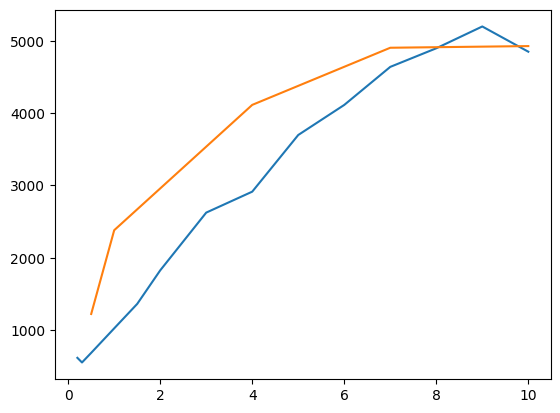

C# / .NET - 1225 responses (2021)
Java - 1191 responses (2021)
Java - 832 responses (2022)


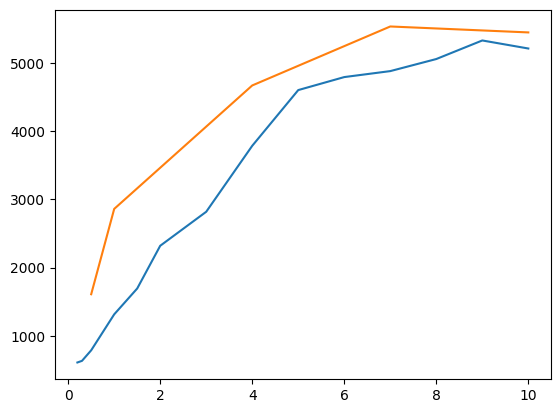

TypeScript - 868 responses (2021)
TypeScript - 719 responses (2022)


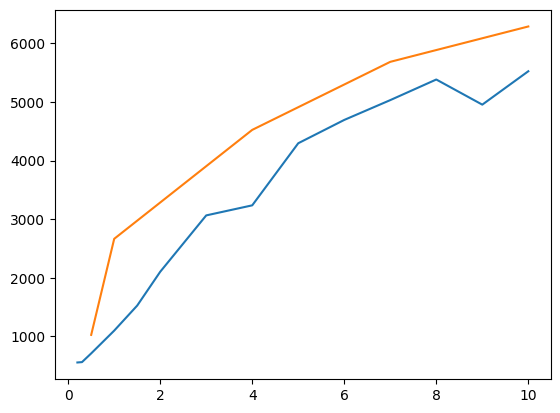

PHP - 867 responses (2021)
PHP - 538 responses (2022)


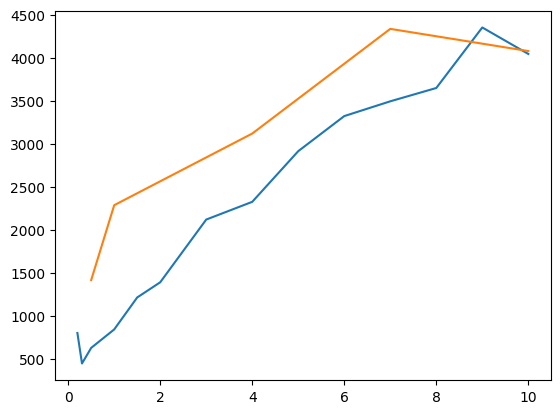

Python - 481 responses (2021)
Python - 395 responses (2022)


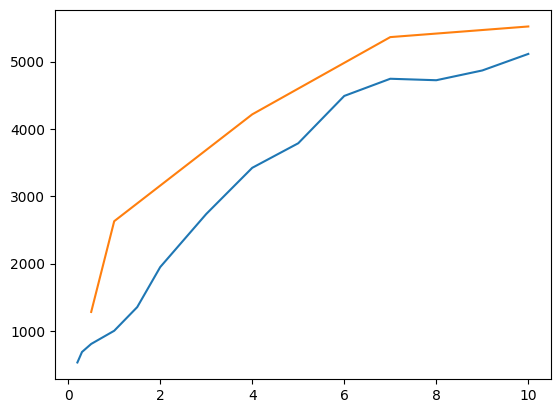

Kotlin - 287 responses (2021)
Kotlin - 254 responses (2022)
Swift - 284 responses (2021)
Swift - 226 responses (2022)
C++ - 274 responses (2021)
C++ - 201 responses (2022)
Ruby - 167 responses (2021)
Ruby - 163 responses (2022)
Go - 151 responses (2021)
Dart - 86 responses (2021)
C - 78 responses (2021)
C - 60 responses (2022)
Scala - 66 responses (2021)
1С - 56 responses (2021)
Salesforce Apex - 53 responses (2021)
SQL - 46 responses (2021)
Інша мова - 34 responses (2021)
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses (2021)
Objective-C - 18 responses (2021)
Objective-C - 8 responses (2022)
Rust - 17 responses (2021)
Elixir - 11 responses (2021)
Не можу обрати одну основну мову - 10 responses (2021)
Clojure - 10 responses (2021)
Clojure - 6 responses (2022)
Erlang - 8 responses (2021)
ABAP - 7 responses (2021)
Pascal/Delphi - 7 responses (2021)
Perl - 5 responses (2021)
Groovy - 5 responses (2021)
APL - 4 responses (2021)
Haskell - 3 responses (2021)


In [91]:
sort_by_criteria_both("Основна мова програмування", "tech", 300)

In [16]:
def undet(index):
    if index <= 0.5:
        return 0.5
    elif index <= 3:
        return 1
    elif index <= 6:
        return 4
    elif index < 10:
        return 7
    return 10

{'Менше як 3 місяці': 0.2, '3 місяці': 0.3, 'Пів року': 0.5, '1 рік': 1, '1,5 року': 1.5, '2 роки': 2, '3 роки': 3, '4 роки': 4, '5 років': 5, '6 років': 6, '7 років': 7, '8 років': 8, '9 років': 9, '10 і більше років': 10}
[10.   7.   4.   1.   0.5]
{'до року': 0.5, 'від 1 до 3 років': 1, 'від 4 до 6 років': 4, 'від 7 до 10 років': 7, 'понад 10 років': 10}
JavaScript - 1541 responses (2021)
JavaScript - 1032 responses (2022)


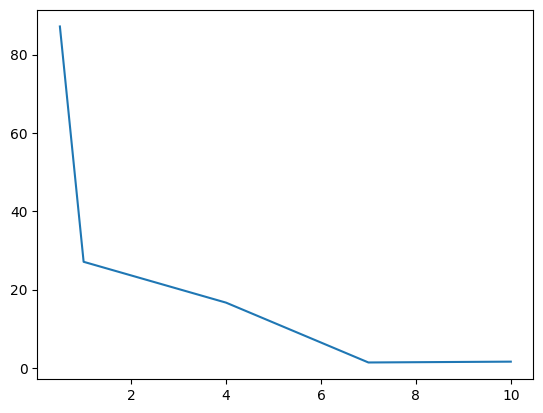

C# / .NET - 1225 responses (2021)
Java - 1191 responses (2021)
Java - 832 responses (2022)


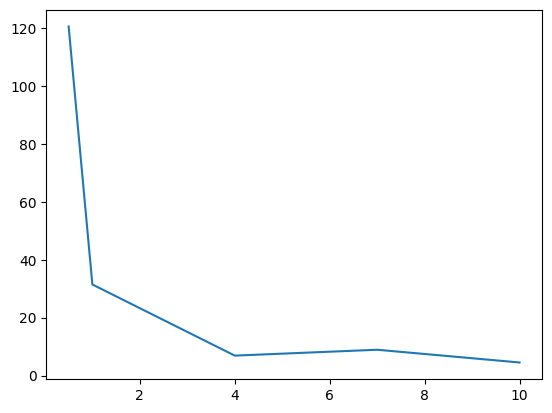

TypeScript - 868 responses (2021)
TypeScript - 719 responses (2022)


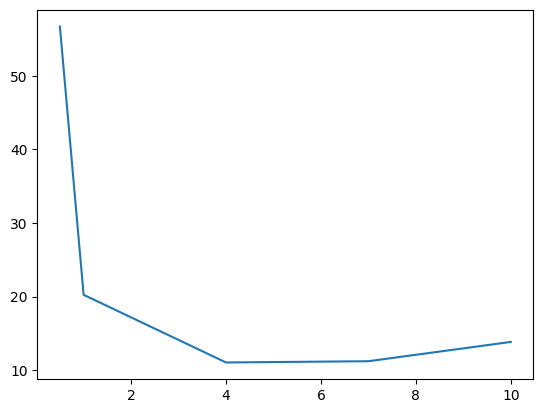

PHP - 867 responses (2021)
PHP - 538 responses (2022)


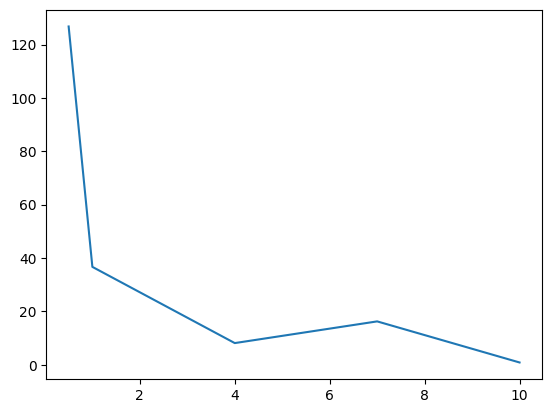

Python - 481 responses (2021)
Python - 395 responses (2022)


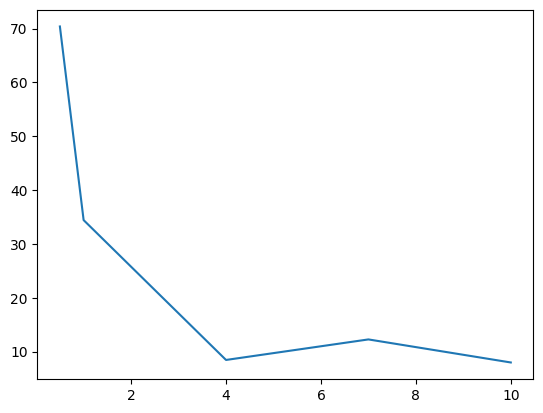

Kotlin - 287 responses (2021)
Kotlin - 254 responses (2022)
Swift - 284 responses (2021)
Swift - 226 responses (2022)
C++ - 274 responses (2021)
C++ - 201 responses (2022)
Ruby - 167 responses (2021)
Ruby - 163 responses (2022)
Go - 151 responses (2021)
Dart - 86 responses (2021)
C - 78 responses (2021)
C - 60 responses (2022)
Scala - 66 responses (2021)
1С - 56 responses (2021)
Salesforce Apex - 53 responses (2021)
SQL - 46 responses (2021)
Інша мова - 34 responses (2021)
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses (2021)
Objective-C - 18 responses (2021)
Objective-C - 8 responses (2022)
Rust - 17 responses (2021)
Elixir - 11 responses (2021)
Не можу обрати одну основну мову - 10 responses (2021)
Clojure - 10 responses (2021)
Clojure - 6 responses (2022)
Erlang - 8 responses (2021)
ABAP - 7 responses (2021)
Pascal/Delphi - 7 responses (2021)
Perl - 5 responses (2021)
Groovy - 5 responses (2021)
APL - 4 responses (2021)
Haskell - 3 responses (2021)


In [18]:
def percentages_by_criteria_both(criteria1, criteria2, threshold=None):
    index_2021 = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values().index
    index_dict_2021 = dict(zip(index_names_2021, index_2021))
    print(index_dict_2021)
    dec_2021_devs['experience'] = dec_2021_devs['Загальний стаж роботи в ІТ'].apply(lambda x: undet(index_dict_2021.get(x, x)))
    print(dec_2021_devs['experience'].unique())

    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values().index
    index_2022 = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.dropna(subset=[criteria2]).groupby('experience')['salary'].mean().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_2022))
    print(index_dict_2022)



    for key in sorted(dec_2021_devs[criteria1].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria1] == key)):
        data_2021 = dec_2021_devs[dec_2021_devs[criteria1] == key].groupby('experience')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()
        data_2022 = june_2022[june_2022[criteria2] == key].groupby('experience')['salary'].mean()

        n_2021 = sum(dec_2021_devs[criteria1] == key)
        if n_2021 != 0:
            print(f"{key} - {n_2021} responses (2021)")

        n_2022 = sum(june_2022[criteria2] == key)
        if n_2022 != 0:
            print(f"{key} - {n_2022} responses (2022)")

        if threshold is None or (n_2021 > threshold and n_2022 > threshold):
            sub = plt.subplot()

            sorted_index_2021 = sorted(data_2021.index)

            salaries = []
            for x in sorted_index_2021:
                salary_2021 = data_2021[x]
                salary_2022 = data_2022[dict(map(tuple, map(reversed, index_dict_2022.items())))[x]]
                salaries.append(salary_2022 / salary_2021 * 100 - 100)
            sub.plot(sorted_index_2021, salaries)
            plt.show()

percentages_by_criteria_both("Основна мова програмування", "tech", 300)

# Stack overflow survey analysis

In [45]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.0 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')

In [ ]:
dataset.columns

In [4]:
converter = {
    "More than 50 years": 51,
    "Less than 1 year": 0.5,
}

def summarize_salary_per_experience(dataset):
    data = dataset.dropna(subset=['ConvertedCompYearly']).groupby('YearsCode')['ConvertedCompYearly']

    devs_per_years = []
    index = sorted(dataset['YearsCode'].dropna().unique(), key=lambda x: float(converter.get(x, x)))
    for x in index:
        y = dataset[dataset["YearsCode"] == x]["ConvertedCompYearly"].dropna().shape[0]
        devs_per_years.append(y)

    print("Developers per year of experience")
    plt.plot([converter.get(x, x) for x in index], devs_per_years)
    plt.show()

    print("Salary per year of experience")
    data = data.median()
    plt.plot([converter.get(x, x) for x in data.index], data)
    plt.show()

In [5]:
def lower_res(years):
    i = float(converter.get(years, years))
    if i <= 10:
        return i
    return 11


def crop_dataset(dataset):
    dataset_cropped = dataset.dropna(subset=["YearsCode"])
    dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
    dataset_cropped = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] < 11]
    return dataset_cropped

In [6]:
def build_graph(sub: plt.subplot, dataset_cropped, label=None):
    print(label, "-", dataset_cropped.shape[0], "responses")

    devs_per_years = []
    index = sorted(dataset_cropped['YearsCode - Less detailed'].dropna().unique())
    for x in index:
        y = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] == x]["ConvertedCompYearly"].dropna().median()
        devs_per_years.append(y)

    sub.plot([converter.get(x, x) for x in index], devs_per_years, label=label)

In [7]:
def filter_by_language(dataset, language):
    bool_index = dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False)
    na_index = bool_index.notna()
    return dataset[na_index][bool_index.dropna()]

def n_devs(dataset, language):
    return sum(dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False).dropna())

def get_most_popular_languages(dataset):
    languages = set().union(*(set(x.split(";")) for x in dataset["LanguageHaveWorkedWith"].dropna().unique()))
    return sorted(languages, key=lambda language: n_devs(dataset, language), reverse=True)

In [8]:
dataset_2022 = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')
dataset_2021 = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv', delimiter=',')

/tmp/ipykernel_166005/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
/tmp/ipykernel_166005/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)


C
2022 - 31347 responses
2021 - 35724 responses


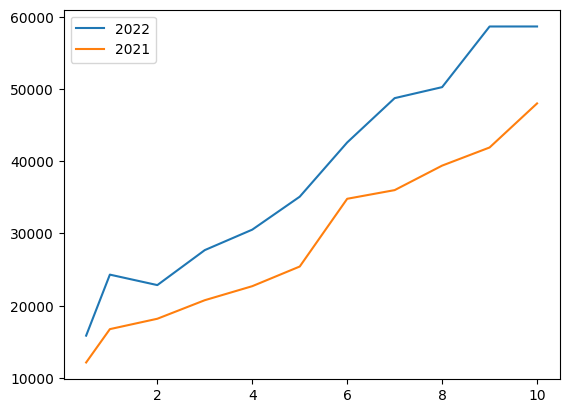

Java
2022 - 31411 responses
2021 - 35184 responses


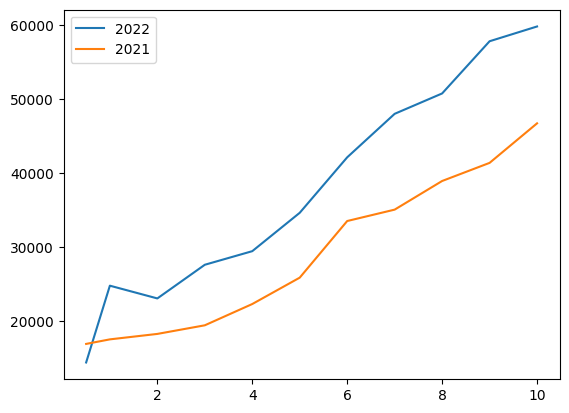

JavaScript
2022 - 27268 responses
2021 - 29984 responses


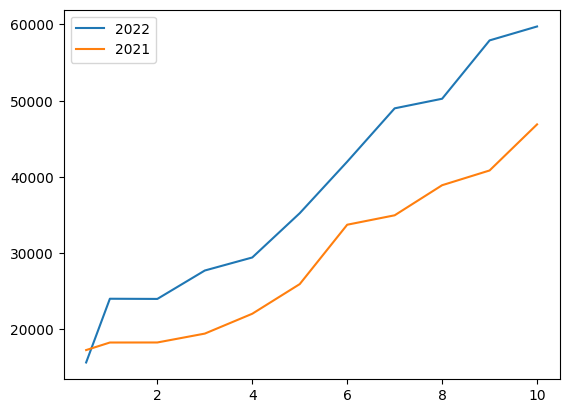

HTML/CSS
2022 - 23765 responses
2021 - 26869 responses


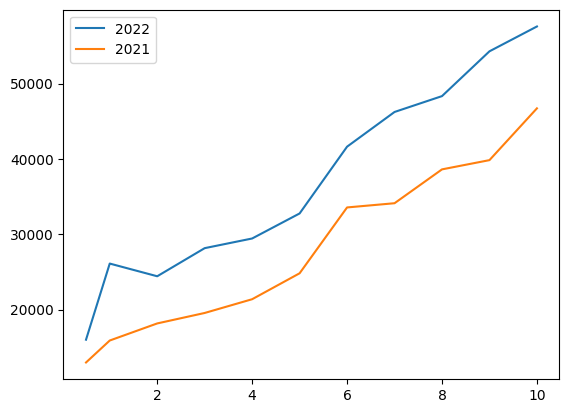

SQL
2022 - 18656 responses
2021 - 20028 responses


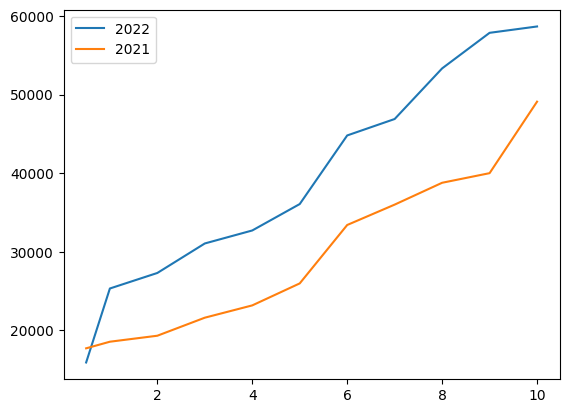

Python
2022 - 21453 responses
2021 - 24436 responses


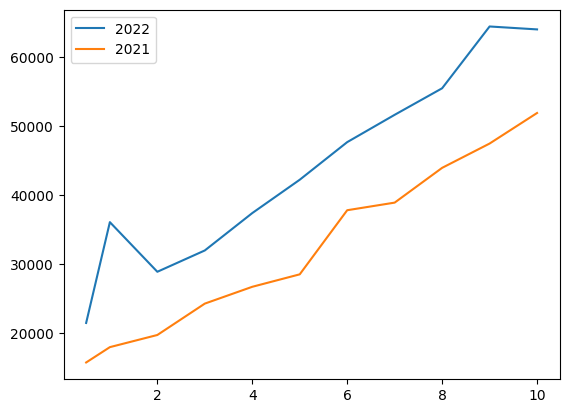

TypeScript
2022 - 13968 responses
2021 - 13004 responses


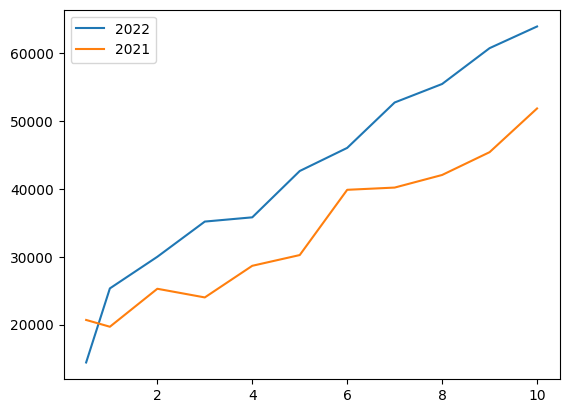

Bash/Shell
2022 - 10087 responses
2021 - 10368 responses


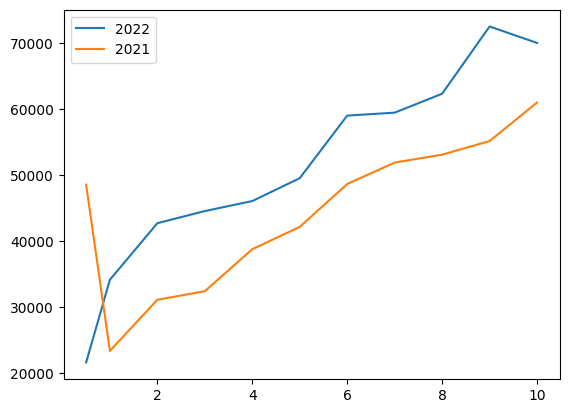

C#
2022 - 10275 responses
2021 - 11593 responses


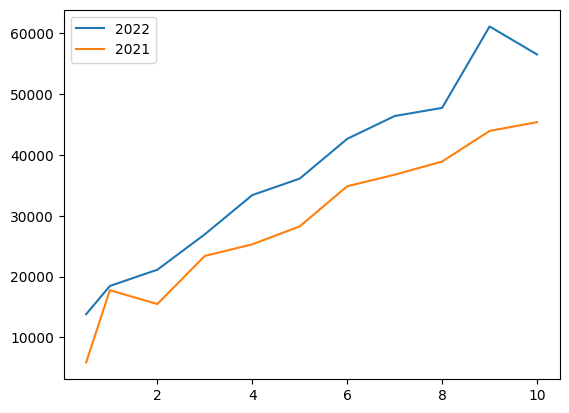

C++
2022 - 9951 responses
2021 - 12298 responses


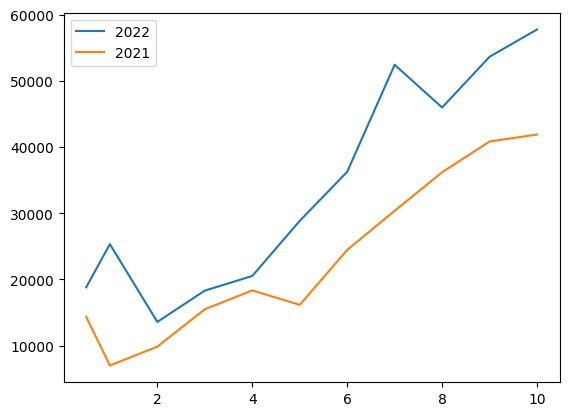

In [9]:
cropped_2022 = crop_dataset(dataset_2022)
cropped_2021 = crop_dataset(dataset_2021)
for language in get_most_popular_languages(dataset)[:10]:
    print(language)
    sub = plt.subplot()
    build_graph(sub, filter_by_language(cropped_2022, language), "2022")
    build_graph(sub, filter_by_language(cropped_2021, language), "2021")
    plt.legend(loc="upper left")
    plt.show()

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_15970/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_15970/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)


C
35724
31347


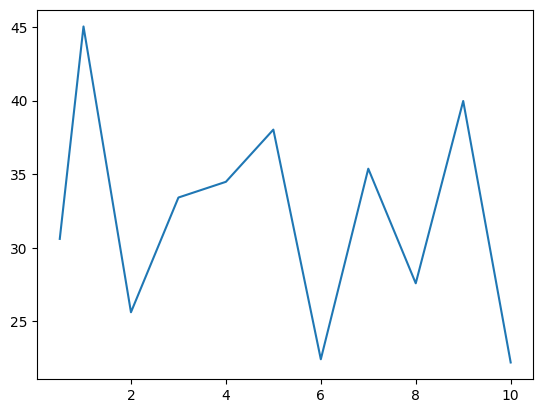

Java
35184
31411


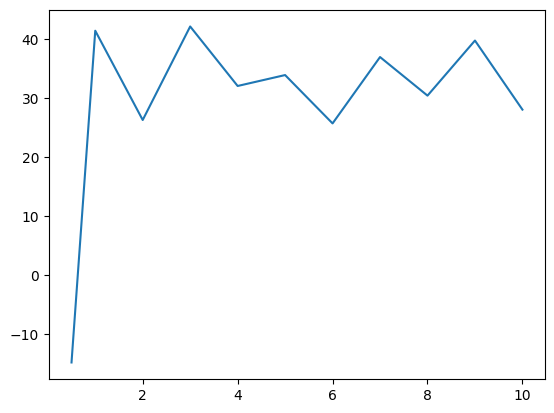

JavaScript
29984
27268


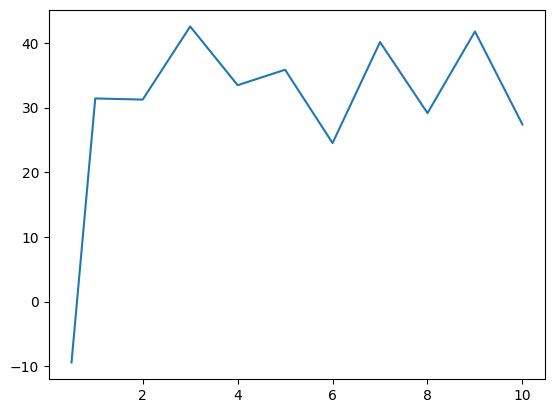

HTML/CSS
26869
23765


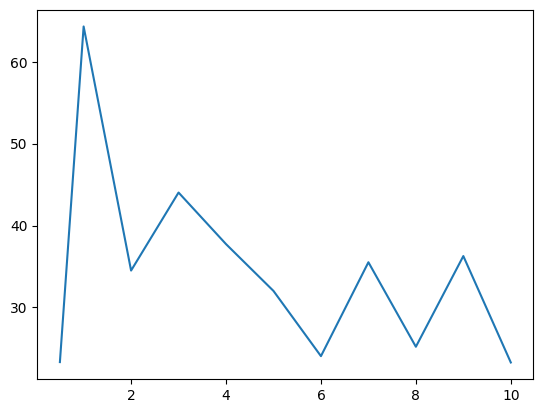

SQL
20028
18656


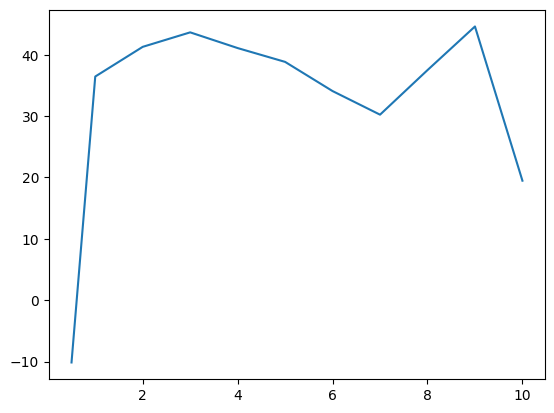

Python
24436
21453


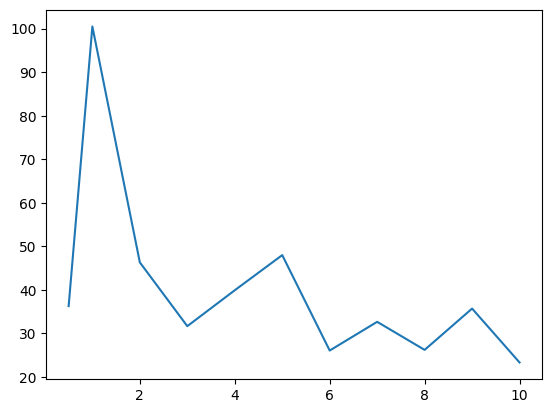

TypeScript
13004
13968


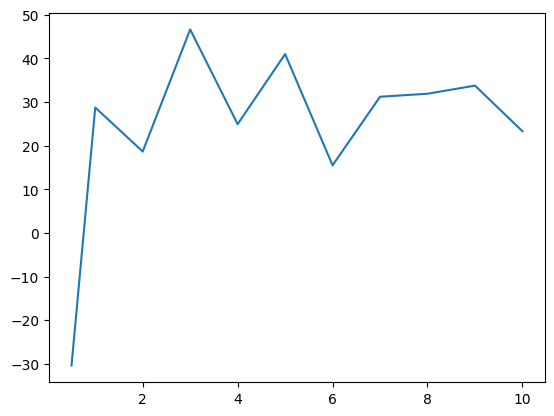

Bash/Shell
10368
10087


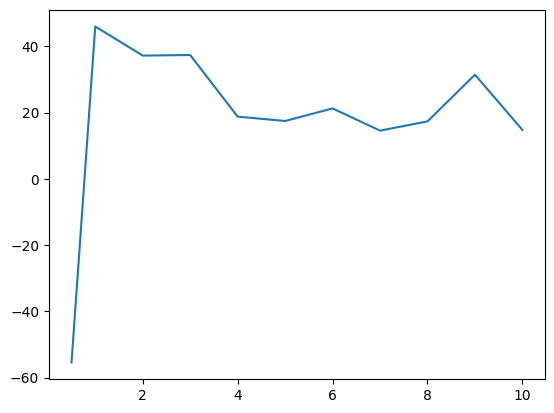

C#
11593
10275


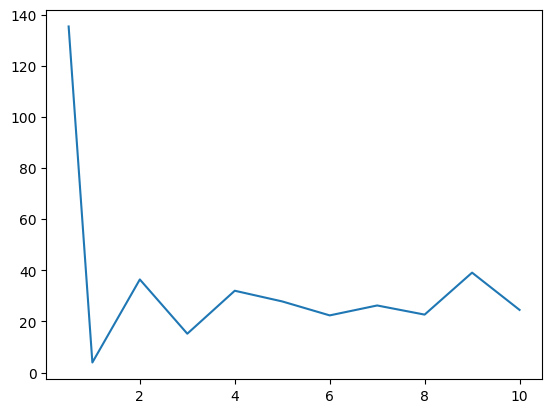

C++
12298
9951


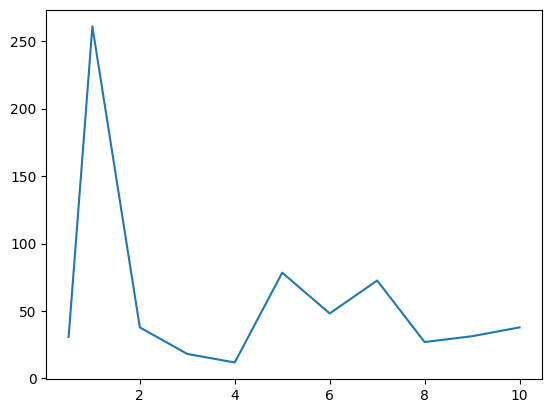

In [60]:
cropped_2022 = crop_dataset(dataset_2022)
cropped_2021 = crop_dataset(dataset_2021)
index = sorted(cropped_2021["YearsCode - Less detailed"].unique())
for language in get_most_popular_languages(dataset)[:10]:
    print(language)
    sub = plt.subplot()
    language_2022 = filter_by_language(cropped_2022, language)
    language_2021 = filter_by_language(cropped_2021, language)
    print(language_2021.shape[0])
    print(language_2022.shape[0])
    salaries = []
    for experience in index:
        salary_2021 = language_2021[language_2021["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salary_2022 = language_2022[language_2022["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salaries.append(salary_2022 / salary_2021 * 100 - 100)
    sub.plot(index, salaries)
    plt.show()